In [34]:
'''    ScreenSense:Kids’ Screentime Visualization 

Project Statement :
                  Analyze kids’ screentime patterns to uncover trends by age, gender, location type 
                  (urban/rural), device type, day-of-week, and activity category using data visualization. The 
                  goal is to present clear, actionable insights for parents, educators, and policymakers. '''

# Week
   #1 — Preprocessing Dataset

### Dataset
### Source: [Kaggle Screentime Dataset for Kids]

import pandas as pd
import numpy as np
df = pd.read_csv("Indian_Kids_Screen_Time.csv")
print("Shape:", df.shape)
df.head()


Shape: (9712, 8)


,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [36]:
#give the basic information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


In [38]:
# shape of the dataset
  # this list out the no of rows,columns of the dataset
df.shape



(9712, 8)

In [40]:
#data types of columns which are attributes
df.dtypes

Age                                    int64
Gender                                object
Avg_Daily_Screen_Time_hr             float64
Primary_Device                        object
Exceeded_Recommended_Limit              bool
Educational_to_Recreational_Ratio    float64
Health_Impacts                        object
Urban_or_Rural                        object
dtype: object

In [42]:
#it gives the  summary statistics for numeric columns

df.describe(include="all")

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
count,9712.000000,9712,9712.000000,9712,9712,9712.000000,6494,9712
unique,NaN,2,NaN,4,2,NaN,15,2
top,NaN,Male,NaN,Smartphone,True,NaN,Poor Sleep,Urban
freq,NaN,4942,NaN,4568,8301,NaN,2268,6851
mean,12.979201,NaN,4.352837,NaN,NaN,0.427226,NaN,NaN
std,3.162437,NaN,1.718232,NaN,NaN,0.073221,NaN,NaN
min,8.000000,NaN,0.000000,NaN,NaN,0.300000,NaN,NaN
25%,10.000000,NaN,3.410000,NaN,NaN,0.370000,NaN,NaN
50%,13.000000,NaN,4.440000,NaN,NaN,0.430000,NaN,NaN
75%,16.000000,NaN,5.380000,NaN,NaN,0.480000,NaN,NaN


In [44]:
# Count missing values per column
df.isnull().sum()




Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64

In [46]:
# Visualize missing value percentage
(df.isnull().mean() * 100).sort_values(ascending=False)


Health_Impacts                       33.134267
Age                                   0.000000
Gender                                0.000000
Avg_Daily_Screen_Time_hr              0.000000
Primary_Device                        0.000000
Exceeded_Recommended_Limit            0.000000
Educational_to_Recreational_Ratio     0.000000
Urban_or_Rural                        0.000000
dtype: float64

In [48]:
#finding out the duplicate rows

print("Duplicate Rows:", df.duplicated().sum())



Duplicate Rows: 44


In [50]:
# Remove the duplicates if exist
df.drop_duplicates(inplace=True)


In [52]:
print("Final Shape:", df.shape)
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())

df.head()


Final Shape: (9668, 8)

Missing Values After Cleaning:
Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3180
Urban_or_Rural                          0
dtype: int64


,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [54]:
#  Fill missing categorical values with mode
for col in df.select_dtypes(include=['object']):
    df[col].fillna(df[col].mode()[0])

In [56]:
# Count missing values per column
df.isnull().sum()

Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3180
Urban_or_Rural                          0
dtype: int64

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [62]:
print(df.columns)


Index(['Age', 'Gender', 'Avg_Daily_Screen_Time_hr', 'Primary_Device',
       'Exceeded_Recommended_Limit', 'Educational_to_Recreational_Ratio',
       'Health_Impacts', 'Urban_or_Rural'],
      dtype='object')


C:\Users\hp\AppData\Local\Temp\ipykernel_10216\15132813.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age', data=df, palette='viridis')


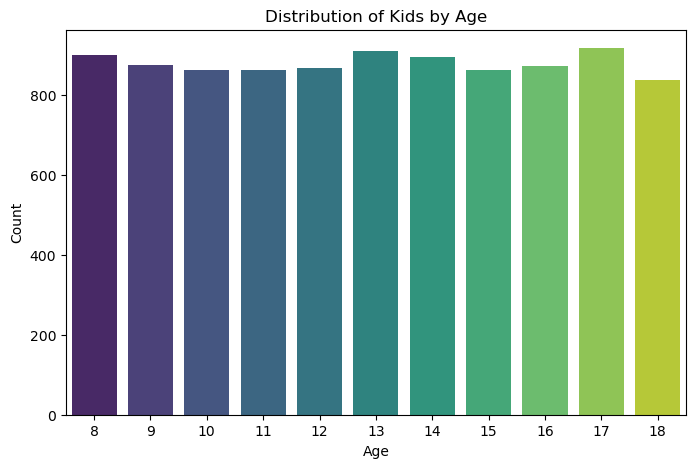

In [64]:
plt.figure(figsize=(8,5))
sns.countplot(x='Age', data=df, palette='viridis')
plt.title("Distribution of Kids by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_10216\304746880.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Primary_Device', data=df, order=df['Primary_Device'].value_counts().index, palette='cool')


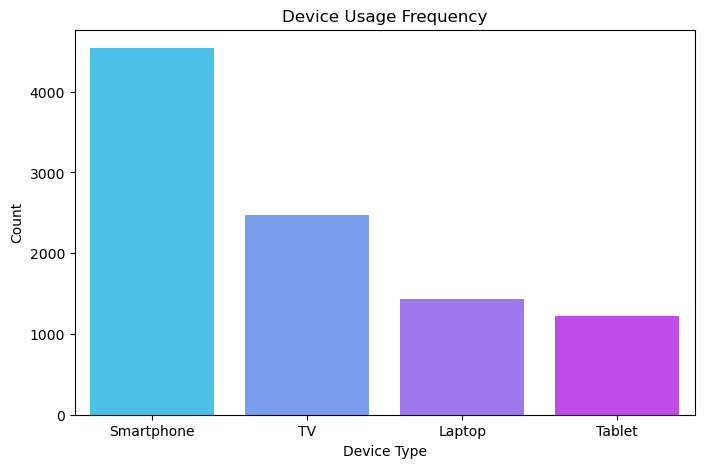

In [66]:
plt.figure(figsize=(8,5))
sns.countplot(x='Primary_Device', data=df, order=df['Primary_Device'].value_counts().index, palette='cool')
plt.title("Device Usage Frequency")
plt.xlabel("Device Type")
plt.ylabel("Count")
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_10216\3956813495.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age', y='Avg_Daily_Screen_Time_hr', data=df, palette='mako')


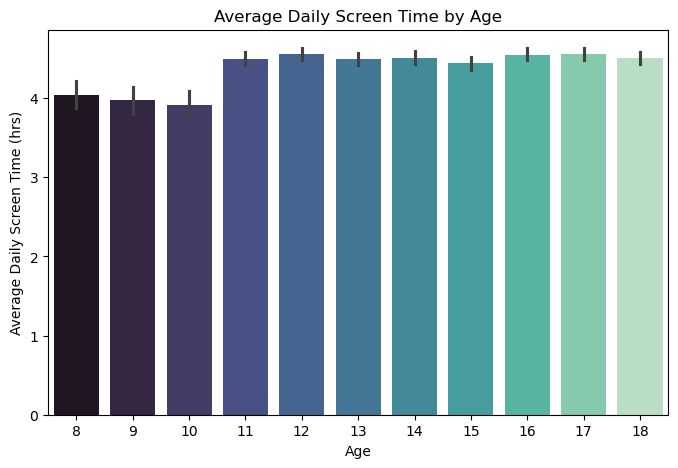

In [68]:
plt.figure(figsize=(8,5))
sns.barplot(x='Age', y='Avg_Daily_Screen_Time_hr', data=df, palette='mako')
plt.title("Average Daily Screen Time by Age")
plt.xlabel("Age")
plt.ylabel("Average Daily Screen Time (hrs)")
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_10216\3061996943.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Urban_or_Rural', y='Avg_Daily_Screen_Time_hr', data=df, palette='Spectral')


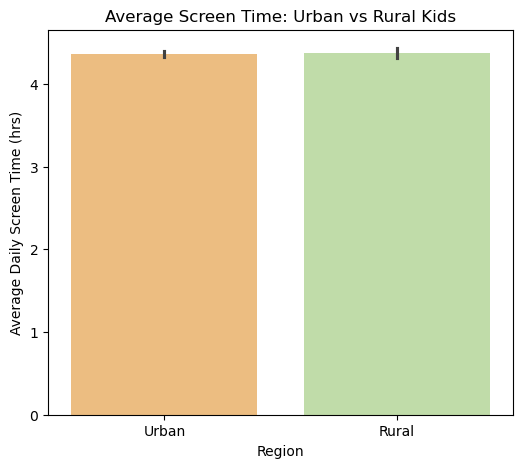

In [70]:
plt.figure(figsize=(6,5))
sns.barplot(x='Urban_or_Rural', y='Avg_Daily_Screen_Time_hr', data=df, palette='Spectral')
plt.title("Average Screen Time: Urban vs Rural Kids")
plt.xlabel("Region")
plt.ylabel("Average Daily Screen Time (hrs)")
plt.show()
